# HZV029 analysis (Fig 2)

Using AS' XCMS table.

Take asari table at average peak height > 1E6 (info in empcpd annotation).



In [1]:
import numpy as np
import json
import pandas as pd

from scipy.stats import pearsonr

from matplotlib import pyplot as plt
# import seaborn 

%matplotlib inline

In [4]:
DIR = 'HZV09-figures/'
asari_table = pd.read_csv(DIR + "Li.full_Feature_table.tsv", index_col=0, header=0, sep='\t')
asari_table

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,...,batch9_MT_20210803_003K,batch9_MT_20210803_007,batch9_MT_20210803_051,batch9_MT_20210803_087,batch9_MT_20210803_089,batch9_MT_20210803_091,batch9_MT_20210803_139,batch9_MT_20210803_181,batch9_MT_20210803_183,batch9_MT_20210803_185
id_number,,,,,,,,,,,,,,,,,,,,,
F1,80.0497,18.16,16.63,31.19,13,8247874,1.00,0.91,130,85,...,0,0,0,0,0,0,0,0,0,0
F2,80.0497,153.21,147.71,157.17,13,2185381,0.77,0.80,18,88,...,0,0,0,0,0,0,0,0,0,0
F3,80.0497,164.79,161.36,171.07,13,1501001,0.56,0.50,13,84,...,0,0,0,0,0,0,0,0,0,0
F4,80.9478,111.08,105.86,122.16,17,21242809,1.00,0.93,222,164,...,186381,61434,79207,161132,158684,125496,134760,163748,160744,179105
F5,80.9478,133.32,122.16,135.69,17,53018429,1.00,0.94,418,164,...,183476,29601,33701,118453,104557,80976,55289,90266,135409,111682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F28612,650.5358,14.37,7.41,21.23,18660,487659693,1.00,1.00,15913,118,...,8506806,0,0,6921839,3381931,0,2288815,0,6544150,6732551
F28613,650.5961,71.04,68.80,73.28,18661,1872938,1.00,0.84,19,6,...,0,0,0,0,0,0,0,0,0,0
F28614,650.5961,75.88,73.28,78.53,18661,5495814,1.00,0.94,31,10,...,0,0,0,0,0,0,0,0,0,0


Above is full table out of asari. 

We select features with average peak height over 1E6, based on `Li.Annotated_empricalCompounds.json`

In [5]:
epds = json.load(open(DIR+'Li.Annotated_empricalCompounds.json'))

print(len(epds), epds['5'])


19237 {'interim_id': 5, 'neutral_formula_mass': 176.986053, 'neutral_formula': 'C5H5Cl2N3', 'Database_referred': [], 'identity': [], 'MS1_pseudo_Spectra': [{'apex': 86, 'peak_area': 336780191, 'height': 8816298, 'left_base': 39, 'right_base': 101, 'cSelectivity': 1.0, 'parent_masstrack_id': 4034, 'mz': 199.9753303527832, 'snr': 1923, 'goodness_fitting': 0.9292053266308398, 'id_number': 'F94', 'rtime': 33.521499454999976, 'rtime_left_base': 15.487347262999979, 'rtime_right_base': 39.304823295000006, 'ion_relation': 'anchor', 'parent_epd_id': 5}, {'apex': 86, 'peak_area': 3379376, 'height': 247617, 'left_base': 65, 'right_base': 95, 'cSelectivity': 1.0, 'parent_masstrack_id': 4075, 'mz': 200.97808074951172, 'snr': 34, 'goodness_fitting': 0.9134398206792865, 'id_number': 'F302', 'rtime': 33.521499454999976, 'rtime_left_base': 25.410956736, 'rtime_right_base': 36.971846223, 'ion_relation': '13C/12C', 'parent_epd_id': 5}, {'apex': 79, 'peak_area': 866764, 'height': 72516, 'left_base': 73, '

In [6]:
# asari.dashboard function
def epd_convert(epd_dict):
    '''
    Format epd_dict to two dicts: peakDict, epdDict
    '''
    peakDict, epdDict = {}, {}
    for k,v in epd_dict.items():
        for P in v['MS1_pseudo_Spectra']:
            peakDict[P['id_number']] = P
        v['MS1_pseudo_Spectra'] = [P['id_number'] for P in v['MS1_pseudo_Spectra']]
        epdDict[k] = v
    return peakDict, epdDict

In [7]:
peakDict, epdDict = epd_convert(epds)
number_samples = 268
use_peaks = []
for k,v in peakDict.items():
    if v['height'] > 268 * 1E6:
        use_peaks.append(k)
        
print(len(use_peaks))

826


In [8]:
use_peaks[:5]

['F114', 'F65', 'F103', 'F123', 'F134']

In [9]:
asari_table = asari_table.loc[use_peaks]
asari_table.shape

(826, 278)

In [10]:
xcms_table = pd.read_csv(DIR+"xcms_1e6filteredFT.csv", index_col=0, header=0,)
xcms_table

,mzmed,mzmin,mzmax,rtmed,rtmin,rtmax,npeaks,blankcounts_AS,Peakcounts_AS,1e6peakcounts_AS,...,batch9_MT_20210803_003K.mzML,batch9_MT_20210803_007.mzML,batch9_MT_20210803_051.mzML,batch9_MT_20210803_087.mzML,batch9_MT_20210803_089.mzML,batch9_MT_20210803_091.mzML,batch9_MT_20210803_139.mzML,batch9_MT_20210803_181.mzML,batch9_MT_20210803_183.mzML,batch9_MT_20210803_185.mzML
FT01462,181.029217,181.029128,181.029353,294.158722,287.835205,297.300659,27,241,27,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT05208,358.368001,358.367785,358.368123,23.737885,21.892328,24.761555,27,241,27,27,...,21383884.0,NaN,23832396.0,25811262.0,26554980.0,26362044.0,2.331844e+07,NaN,30109386.0,28394276.0
FT05476,372.312656,372.312617,372.312780,80.944515,80.330681,85.264931,36,241,27,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT05945,406.164078,406.163813,406.164575,23.119003,22.082613,24.713634,27,241,27,27,...,9682945.0,NaN,NaN,10696749.0,10087932.0,NaN,NaN,NaN,10557344.0,12748197.0
FT06109,418.991197,418.991125,418.991327,146.699829,146.077148,147.971481,27,241,27,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT00446,132.101945,132.101669,132.102544,125.440563,118.163147,137.182922,538,1,267,267,...,64214206.0,72020922.0,65310994.0,74429232.0,76536752.0,72670738.0,6.355402e+07,60200508.0,63947726.0,67471240.0
FT00460,133.079993,133.079723,133.080609,163.937454,162.486862,165.440064,267,1,267,267,...,4532679.5,5305855.0,4826447.0,5005677.0,5036706.0,5322993.5,4.148910e+06,4055345.0,3972438.5,4237910.0
FT00646,144.101968,144.101629,144.102605,136.734772,135.056427,141.598465,273,1,267,267,...,18490242.0,448366912.0,441317792.0,18244584.0,18615118.0,451412704.0,4.194441e+08,424947232.0,17355554.0,17649520.0
FT00148,104.106929,104.106740,104.107386,118.400597,115.001724,123.821396,353,0,268,268,...,164197920.0,193337360.0,185498112.0,149795504.0,154546416.0,193598336.0,1.889429e+08,196017216.0,165438864.0,164188144.0


In [11]:
files = [x for x in xcms_table.columns if '.mzML' in x]
len(files)

268

In [12]:
with open('HZV09_filenames.txt', 'w') as O:
    O.write('\n'.join(files))

In [13]:
# match functions
# 0.000010 is 10 ppm
PPM_tolerance = 0.000005
# use a large number to include anything in RTime, small number to be specific
RTime_tolerance = 10       # seconds in retention time, usually a small number
                            # more lenient for diff instruments
                            # and possible diff void volume
             
# F1 = (m/z, rt)
def match2(F1, F2, PPM_tolerance=PPM_tolerance, RTime_tolerance=RTime_tolerance):
    if abs(F1[0]-F2[0])/F1[0] < PPM_tolerance and abs(F1[1] - F2[1]) < RTime_tolerance:
        return True
    else:
        return False
    
# test
match2((129.1541, 55), (129.1538, 14))

False

In [14]:
pd.notna(xcms_table.iloc[1, 11:]).sum() 

27

In [15]:
268 * .4

107.2

In [16]:
x, y = xcms_table.iloc[3, :][['mzmed', 'rtmed']]
print(x, y)

406.16407769999995 23.1190033


In [17]:
xcms_table.index[3]

'FT05945'

In [18]:
xcms_table.shape[0]

1091

In [19]:
mz_a, rt_a = asari_table['mz'].to_list(), asari_table['rtime'].to_list()
mz_x, rt_x = xcms_table['mzmed'].to_list(), xcms_table['rtmed'].to_list()
N1_, N2_ = len(mz_a), len(mz_x)
print(N1_, N2_)

826 1091


In [20]:
good = []
for ii in range(N1_):
    F1 = (mz_a[ii], rt_a[ii])
    for jj in range(N2_):
        F2 = (mz_x[jj], rt_x[jj])
        if match2(F1, F2):
            good.append((ii, jj))

In [21]:
len(good)

1052

In [22]:
good[-5:]

[(818, 706), (821, 255), (823, 376), (825, 210), (825, 839)]

In [23]:
# not in overlap but in XCMS
set2 = set([x[1] for x in good])
print(len(set2))
xcms_only = [jj for jj in range(N2_) if jj not in set2]
print(len(xcms_only), xcms_only[:5])


912
179 [0, 1, 20, 27, 30]


In [24]:
912/1091

0.8359303391384051

In [25]:
# not in overlap but in asari
set1 = set([x[0] for x in good])
print(len(set1))
asari_only = [ii for ii in range(N1_) if ii not in set1]
print(len(asari_only), asari_only[:5])


507
319 [0, 1, 3, 4, 5]


### Summary 1

Btw two tables, 912 features in XCMS are matched to 507 features in asari, based on 5 ppm and 10 secs.

This indicates that XCMS splits more peaks than asari.

Cverage on XCMS is 912/1091.

**Next, we filter by presence of >40% samples**

In [26]:
xcms_table = xcms_table[xcms_table['1e6peakcounts_AS']>107]
xcms_table.shape

(286, 279)

In [27]:
xcms_table.head(10)

,mzmed,mzmin,mzmax,rtmed,rtmin,rtmax,npeaks,blankcounts_AS,Peakcounts_AS,1e6peakcounts_AS,...,batch9_MT_20210803_003K.mzML,batch9_MT_20210803_007.mzML,batch9_MT_20210803_051.mzML,batch9_MT_20210803_087.mzML,batch9_MT_20210803_089.mzML,batch9_MT_20210803_091.mzML,batch9_MT_20210803_139.mzML,batch9_MT_20210803_181.mzML,batch9_MT_20210803_183.mzML,batch9_MT_20210803_185.mzML
FT00375,129.102241,129.102119,129.102848,25.799154,20.991308,33.032677,110,160,108,108,...,6.947674e+06,NaN,NaN,7511370.5,7651562.50,6322132.0,6.162466e+06,5983835.0,8.178436e+06,7.769105e+06
FT05263,361.131502,361.131141,361.131846,22.721242,21.923191,36.733330,114,160,108,108,...,8.539888e+06,NaN,NaN,9975289.0,10824808.00,NaN,NaN,NaN,1.086481e+07,1.019453e+07
FT09039,703.574651,703.574144,703.575087,85.082275,83.963921,86.673172,109,160,108,108,...,5.702852e+06,NaN,NaN,NaN,NaN,NaN,8.148130e+06,NaN,NaN,5.193656e+06
FT09715,782.569199,782.568617,782.569615,68.527054,59.818619,75.870110,163,160,108,108,...,1.025465e+08,NaN,NaN,93459904.0,93538744.00,NaN,1.275243e+08,136704448.0,1.006225e+08,1.008694e+08
FT10399,844.023596,844.023122,844.024110,146.969284,146.110809,147.647110,108,160,108,108,...,2.924044e+06,NaN,NaN,2815167.0,2596433.25,NaN,3.027238e+06,2831774.5,3.106846e+06,3.027609e+06
FT09981,807.572728,807.572124,807.573110,68.141453,53.781982,75.523323,168,159,109,109,...,1.696220e+07,NaN,NaN,14183543.0,15764265.00,NaN,4.035486e+07,41734804.0,1.762475e+07,1.770829e+07
FT10383,843.020144,843.019651,843.020613,146.895615,146.110809,147.408569,109,159,109,109,...,1.320808e+07,NaN,NaN,12903379.0,11973683.00,NaN,1.252013e+07,12837366.0,1.326396e+07,1.293218e+07
FT09456,754.009565,754.009123,754.010088,146.910111,145.799103,147.790695,110,158,110,110,...,2.401677e+06,NaN,NaN,NaN,2217165.25,NaN,2.294265e+06,2355717.0,2.412511e+06,NaN
FT09725,783.572718,783.572122,783.573098,68.509865,59.818619,75.870110,173,158,110,110,...,4.964181e+07,NaN,NaN,45815072.0,45176884.00,NaN,6.104854e+07,65189060.0,5.019264e+07,4.967064e+07
FT05920,404.206922,404.206625,404.207465,16.125416,15.070000,17.164841,111,157,111,111,...,2.684945e+07,NaN,NaN,91904704.0,NaN,NaN,2.669917e+07,27599348.0,9.410213e+07,8.915894e+07


In [28]:
asari_table = asari_table[asari_table['detection_counts'] > 107]
asari_table.shape

(809, 278)

In [29]:
mz_a, rt_a = asari_table['mz'].to_list(), asari_table['rtime'].to_list()
mz_x, rt_x = xcms_table['mzmed'].to_list(), xcms_table['rtmed'].to_list()
N1_, N2_ = len(mz_a), len(mz_x)
print(N1_, N2_)

809 286


In [30]:
good = []
for ii in range(N1_):
    F1 = (mz_a[ii], rt_a[ii])
    for jj in range(N2_):
        F2 = (mz_x[jj], rt_x[jj])
        if match2(F1, F2):
            good.append((ii, jj))

In [31]:
len(good)

290

In [32]:
good[:5]

[(1, 212), (5, 270), (8, 224), (9, 282), (11, 281)]

In [33]:
# not in overlap but in XCMS
set2 = set([x[1] for x in good])
print(len(set2))
xcms_only = [jj for jj in range(N2_) if jj not in set2]
print(len(xcms_only), xcms_only[:5])


267
19 [0, 14, 20, 25, 29]


In [34]:
# not in overlap but in asari
set1 = set([x[0] for x in good])
print(len(set1))
asari_only = [ii for ii in range(N1_) if ii not in set1]
print(len(asari_only), asari_only[:5])


290
519 [0, 2, 3, 4, 6]


**Plot signals in overlap peaks on a random sample**

In [35]:
# get a random file name
import random
ii = random.randint(0, 268)
print(ii)
files[ii]

163


'batch3_MT_20210728_185.mzML'

In [36]:
# based on the numbers above, asari features are unique 290/290, but XCMS features are not

good_xcms = [x[1] for x in good]
use_pairs = [x for x in good if good_xcms.count(x[1])==1]
use_pairs[:5]

[(1, 212), (5, 270), (8, 224), (9, 282), (16, 248)]

In [37]:
# to fix downstream ouput by ii from last run as 66
ii=66

In [38]:
xcms_table[files[ii]].iloc[[9, 10]]

FT05920     3850023.25
FT09514    51236604.00
Name: batch13_MT_20210807_001E.mzML, dtype: float64

In [39]:
X1 = [x[1] for x in use_pairs]
X0 = [x[0] for x in use_pairs]

v_xcms = xcms_table[files[ii]].iloc[X1].to_list()
v_asari = asari_table[files[ii].replace('.mzML', '')].iloc[X0].to_list()

CM = pd.DataFrame(
{
    'xcms': v_xcms, 'asari': v_asari
})

print(CM.shape)
CM = CM[CM['xcms'] > 1][CM['asari']>1]
print(CM.shape)

CM = np.log2(CM+1)

CM.corr()

(244, 2)
(239, 2)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


,xcms,asari
xcms,1.000000,0.941621
asari,0.941621,1.000000


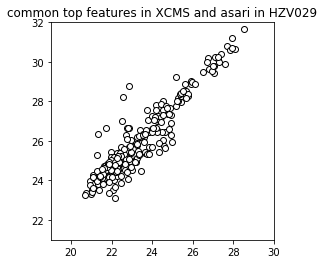

In [40]:
plt.figure(figsize=(4,4))
plt.plot(CM['xcms'], CM['asari'], color='w', marker='o', mew=1, mec='k')
plt.title("common top features in XCMS and asari in HZV029")
plt.ylim(21, 32)
plt.xlim(19, 30)
plt.savefig('fig2A.pdf')

### Summary 2

267/286 features in XCMS are found in asari.

Investigate the unfound 19 featurs.

In [41]:
xcms_table.iloc[xcms_only, :20]

,mzmed,mzmin,mzmax,rtmed,rtmin,rtmax,npeaks,blankcounts_AS,Peakcounts_AS,1e6peakcounts_AS,Verify_AS,batch1_MT_20210726_001.mzML,batch1_MT_20210726_003.mzML,batch1_MT_20210726_005.mzML,batch1_MT_20210726_007.mzML,batch1_MT_20210726_009.mzML,batch1_MT_20210726_015.mzML,batch1_MT_20210726_059.mzML,batch1_MT_20210726_095.mzML,batch1_MT_20210726_097.mzML
FT00375,129.102241,129.102119,129.102848,25.799154,20.991308,33.032677,110,160,108,108,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT09125,713.008132,713.007636,713.008606,146.922012,146.002243,147.690918,113,155,113,113,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT09055,706.000160,705.999633,706.000614,146.885879,145.042984,147.983353,114,154,114,114,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT09164,717.061163,717.060672,717.061609,110.399185,109.250801,112.514572,116,152,116,116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT08556,631.005081,631.004626,631.005606,146.956360,145.781113,148.000153,117,151,117,117,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT09095,709.073538,709.073120,709.074079,110.446121,109.413040,112.120613,119,149,119,119,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT02448,228.019721,228.019474,228.020008,17.295740,8.966453,25.557989,131,146,122,122,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT08838,672.006631,672.006150,672.007084,146.937904,145.417709,148.020371,128,140,128,128,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT02099,210.993697,210.993117,210.994116,16.920996,1.703908,18.318130,160,137,131,131,1,NaN,5813613.50,1.144519e+07,1.096891e+07,1.057865e+07,4317338.000,3175940.250,6411635.00,6851333.50
FT01301,174.185360,174.185127,174.186115,23.784871,22.802380,28.109764,146,122,146,146,1,2823491.75,NaN,4.346151e+06,4.490937e+06,4.795084e+06,NaN,NaN,4607483.50,5088541.00


In [42]:
# check if they are in full asari table

asari_table = pd.read_csv(DIR+"Li.full_Feature_table.tsv", index_col=0, header=0, sep='\t')
mz_a, rt_a = asari_table['mz'].to_list(), asari_table['rtime'].to_list()

xcms_table = xcms_table.iloc[xcms_only, :20]
mz_x, rt_x = xcms_table['mzmed'].to_list(), xcms_table['rtmed'].to_list()
N1_, N2_ = len(mz_a), len(mz_x)
print(N1_, N2_)

28616 19


In [43]:
good = []
for ii in range(N1_):
    F1 = (mz_a[ii], rt_a[ii])
    for jj in range(N2_):
        F2 = (mz_x[jj], rt_x[jj])
        if match2(F1, F2):
            good.append((ii, jj))

In [44]:
len(good)

12

In [45]:
# not in overlap but in XCMS
set2 = set([x[1] for x in good])
print(len(set2))
xcms_only = [jj for jj in range(N2_) if jj not in set2]
print(len(xcms_only), xcms_only[:5])


10
9 [0, 6, 8, 9, 12]


In [46]:
xcms_table.iloc[xcms_only, :20]

,mzmed,mzmin,mzmax,rtmed,rtmin,rtmax,npeaks,blankcounts_AS,Peakcounts_AS,1e6peakcounts_AS,Verify_AS,batch1_MT_20210726_001.mzML,batch1_MT_20210726_003.mzML,batch1_MT_20210726_005.mzML,batch1_MT_20210726_007.mzML,batch1_MT_20210726_009.mzML,batch1_MT_20210726_015.mzML,batch1_MT_20210726_059.mzML,batch1_MT_20210726_095.mzML,batch1_MT_20210726_097.mzML
FT00375,129.102241,129.102119,129.102848,25.799154,20.991308,33.032677,110,160,108,108,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT02448,228.019721,228.019474,228.020008,17.295740,8.966453,25.557989,131,146,122,122,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FT02099,210.993697,210.993117,210.994116,16.920996,1.703908,18.318130,160,137,131,131,1,NaN,5813613.50,1.144519e+07,1.096891e+07,1.057865e+07,4317338.000,3175940.250,6411635.00,6851333.50
FT01301,174.185360,174.185127,174.186115,23.784871,22.802380,28.109764,146,122,146,146,1,2823491.75,NaN,4.346151e+06,4.490937e+06,4.795084e+06,NaN,NaN,4607483.50,5088541.00
FT03089,256.299939,256.299625,256.300608,23.254405,22.080029,25.843128,188,80,188,188,1,2531502.25,4015844.50,2.985488e+06,3.227606e+06,3.377290e+06,3592406.000,3379477.750,3338908.25,3354742.25
FT00899,156.113338,156.113117,156.113933,14.840789,3.182078,30.926365,202,66,202,202,1,NaN,1836919.25,1.816213e+06,1.866763e+06,1.906004e+06,1878453.000,2559990.500,2260328.25,2396270.00
FT00374,129.102330,129.102117,129.102853,13.555183,2.810817,20.940001,204,64,204,204,1,NaN,5212382.50,5.693758e+06,5.456042e+06,5.325474e+06,5591159.000,6591657.500,6414409.50,6954311.50
FT00294,120.080835,120.080623,120.081339,15.344868,2.810817,32.653839,265,10,258,258,1,NaN,5428199.50,5.433279e+06,5.868044e+06,5.406052e+06,5487784.000,5867279.500,6366283.50,6492624.00
FT00110,100.112096,100.111716,100.112541,15.144384,2.429454,32.653839,264,8,260,260,1,NaN,NaN,1.092800e+06,NaN,1.141508e+06,1162441.875,1462593.875,1541499.50,1490627.00


In [47]:
# nice print of the 9 missed peaks 

X = [round(ii,4) for ii in xcms_table['mzmed'].iloc[xcms_only]]
W = [int(ii) for ii in xcms_table['rtmed'].iloc[xcms_only]]
print([ii for ii in zip(X, W)])

[(129.1022, 25), (228.0197, 17), (210.9937, 16), (174.1854, 23), (256.2999, 23), (156.1133, 14), (129.1023, 13), (120.0808, 15), (100.1121, 15)]


In [48]:
for ii in zip(X, W):
    print( str(ii[0]) + '@' + str(ii[1]))

129.1022@25
228.0197@17
210.9937@16
174.1854@23
256.2999@23
156.1133@14
129.1023@13
120.0808@15
100.1121@15


## Summary 3

Out of 19 features in XCMS, 10 are in full asari table.

The remaining 9 are not deemed good peaks in asari (1 has only 3 data points above half height; others high bkg).

EIC figures saved under `examined_EICs/`.